In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1. 加载数据集
batch_size = 256

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 归一化
])

# 加载训练和测试数据集
train_dataset = datasets.FashionMNIST(root='../data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='../data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [6]:
# 2. 定义模型
class SoftmaxRegression(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # 将图像展开为平坦向量
        return self.linear(x)

num_inputs = 28 * 28  # 每个图片的像素点总数
num_outputs = 10      # Fashion-MNIST 的类别数
model = SoftmaxRegression(num_inputs, num_outputs)

# 3. 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # Softmax + 交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# 4. 模型训练
def train_epoch(model, train_loader, loss_fn, optimizer):
    model.train()
    total_loss, total_correct = 0, 0
    for X, y in train_loader:
        y_hat = model(X)
        loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X.shape[0]
        total_correct += (y_hat.argmax(1) == y).sum().item()
    return total_loss / len(train_loader.dataset), total_correct / len(train_loader.dataset)

def evaluate_accuracy(model, test_loader):
    model.eval()
    total_correct = 0
    with torch.no_grad():
        for X, y in test_loader:
            y_hat = model(X)
            total_correct += (y_hat.argmax(1) == y).sum().item()
    return total_correct / len(test_loader.dataset)

Epoch 1/10, Loss: 0.6833, Train Acc: 0.7635, Test Acc: 0.7815
Epoch 2/10, Loss: 0.4952, Train Acc: 0.8257, Test Acc: 0.8136
Epoch 3/10, Loss: 0.4612, Train Acc: 0.8379, Test Acc: 0.8163
Epoch 4/10, Loss: 0.4520, Train Acc: 0.8419, Test Acc: 0.8249
Epoch 5/10, Loss: 0.4444, Train Acc: 0.8440, Test Acc: 0.8294
Epoch 6/10, Loss: 0.4331, Train Acc: 0.8497, Test Acc: 0.8218
Epoch 7/10, Loss: 0.4331, Train Acc: 0.8476, Test Acc: 0.8246
Epoch 8/10, Loss: 0.4239, Train Acc: 0.8515, Test Acc: 0.8306
Epoch 9/10, Loss: 0.4239, Train Acc: 0.8513, Test Acc: 0.8297
Epoch 10/10, Loss: 0.4230, Train Acc: 0.8515, Test Acc: 0.8329


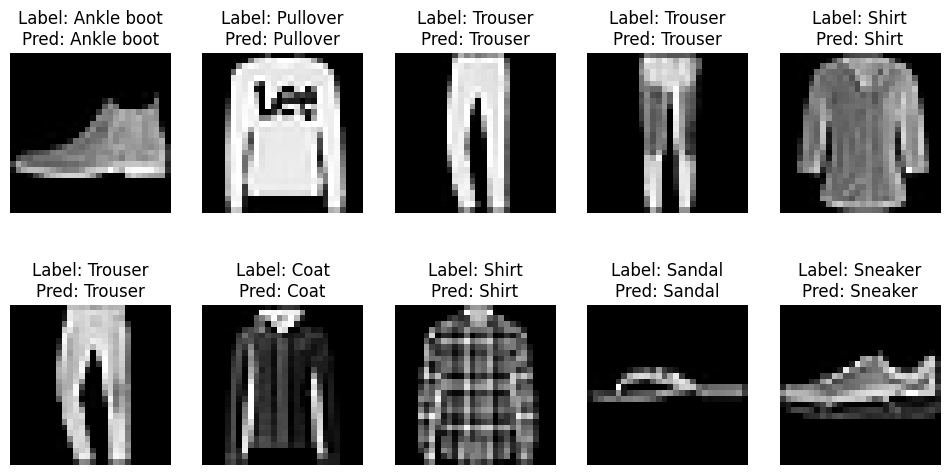

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, loss_fn, optimizer)
    test_acc = evaluate_accuracy(model, test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# 5. 可视化结果
def show_images(images, labels, preds, classes, num=10):
    plt.figure(figsize=(12, 6))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        title = f"Label: {classes[labels[i]]}\nPred: {classes[preds[i]]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# 选取测试数据中的部分样本
classes = train_dataset.classes
test_iter = iter(test_loader)
images, labels = next(test_iter)
preds = model(images).argmax(1)
show_images(images[:10], labels[:10], preds[:10], classes)